In [97]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np
from ydata_profiling import ProfileReport        #pandas-profiling is outdated so change to ydata 
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns

from seaborn import load_dataset # this method will help us to #download the Titanic dataset
plt.style.use('ggplot')

np.random.seed(42)

In [98]:
data=pd.read_csv(r"D:\studying\Machine learning MM\voice.csv",encoding='UTF-8')

In [99]:
# x=ProfileReport(data)
# x

In [100]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [101]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [102]:
fetch=data['label']
fetch

0         male
1         male
2         male
3         male
4         male
         ...  
3163    female
3164    female
3165    female
3166    female
3167    female
Name: label, Length: 3168, dtype: object

In [103]:

feature=data.filter(['meanfun' , 'minfun', 'maxfun'],axis=1)
Data_frame_feature=pd.DataFrame(data=feature)
# feature=np.array(feature)
Data_frame_feature

,meanfun,minfun,maxfun
0,0.084279,0.015702,0.275862
1,0.107937,0.015826,0.250000
2,0.098706,0.015656,0.271186
3,0.088965,0.017798,0.250000
4,0.106398,0.016931,0.266667
...,...,...,...
3163,0.182790,0.083770,0.262295
3164,0.188980,0.034409,0.275862
3165,0.209918,0.039506,0.275862
3166,0.172375,0.034483,0.250000


In [104]:

for col in Data_frame_feature.columns:
    print(Data_frame_feature[col].unique())


[0.08427911 0.10793655 0.09870626 ... 0.20991768 0.172375   0.18560693]
[0.01570167 0.01582591 0.01565558 0.01779755 0.01693122 0.0171123
 0.02622951 0.01775805 0.01795735 0.01930036 0.02206897 0.01913876
 0.01678909 0.025      0.02083333 0.01832761 0.01754386 0.01567091
 0.01571709 0.01576355 0.01614531 0.01568627 0.01609658 0.01564027
 0.01621074 0.01584158 0.01624365 0.0170394  0.01626016 0.01727862
 0.01656315 0.01675393 0.01634321 0.01841197 0.01661475 0.12121212
 0.01677149 0.01616162 0.01593625 0.0159204  0.016      0.01581028
 0.01606426 0.0162767  0.01577909 0.01873536 0.01724138 0.02179837
 0.02671119 0.02472952 0.0212766  0.02035623 0.0608365  0.02439024
 0.03333333 0.02725724 0.01652893 0.05405405 0.01886792 0.01603206
 0.01595214 0.01853998 0.02618658 0.01666667 0.02113606 0.01668405
 0.01851852 0.0201005  0.0199005  0.02507837 0.01814059 0.01573255
 0.01767956 0.01789709 0.01579467 0.01612903 0.01635992 0.01639344
 0.01760176 0.01741023 0.01649485 0.01766004 0.01707577 0.

In [105]:
target=pd.get_dummies(data=fetch,drop_first=True)
target=np.array(target)
target

array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [106]:
target_dataframe=pd.DataFrame(data=target)
target_dataframe[0].unique()

array([ True, False])

In [107]:
feature

,meanfun,minfun,maxfun
0,0.084279,0.015702,0.275862
1,0.107937,0.015826,0.250000
2,0.098706,0.015656,0.271186
3,0.088965,0.017798,0.250000
4,0.106398,0.016931,0.266667
...,...,...,...
3163,0.182790,0.083770,0.262295
3164,0.188980,0.034409,0.275862
3165,0.209918,0.039506,0.275862
3166,0.172375,0.034483,0.250000


In [108]:
feature = (feature  -feature.mean())/feature.std()

<Axes: >

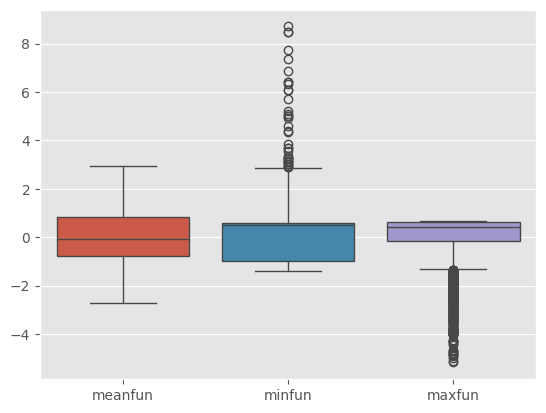

In [109]:
sns.boxplot(data=feature)

In [110]:
# Q1 = np.percentile(feature, 25, interpolation = 'midpoint')
# Q3 = np.percentile(feature, 75, interpolation = 'midpoint')
# IQR = Q3 - Q1
# IQR

In [111]:
#Outlier Detection Logic

for col in feature.columns:  #iterate over my feature columns             # This cell deal with the outliers
    mean=feature[col].mean()                                              # After scalling any value is more than 3 it considerd as outlier, I made it equal to the mean
    std=feature[col].std()
    Q1 = np.percentile(feature[col], 25, interpolation = 'midpoint')  #  Value below which 25% of the data lies.
    Q3 = np.percentile(feature[col], 75, interpolation = 'midpoint')  #  Value below which 75% of the data lies.
    IQR = Q3 - Q1  # Interquartile Range is used to detect outliers.  --> Outliers are defined as values outside the range: [Q1 - 1.5 *IQR , Q3 + 1.5 *IQR]
    print(IQR)
    for i in range(3168): # Iterating through Each Row and Replacing Outliers:
        if(feature[col][i]>(Q3+1.5*IQR) or feature[col][i]<(Q1-1.5*IQR)):

            feature[col][i]=mean # mean ensures that extreme values do not affect the model's performance.

1.6282220252662472
1.5442784022030303
0.7809339957873056


C:\Users\HP\AppData\Local\Temp\ipykernel_126692\2344661216.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  feature[col][i]=mean # mean ensures that extreme values do not affect the model's performance.


<Axes: >

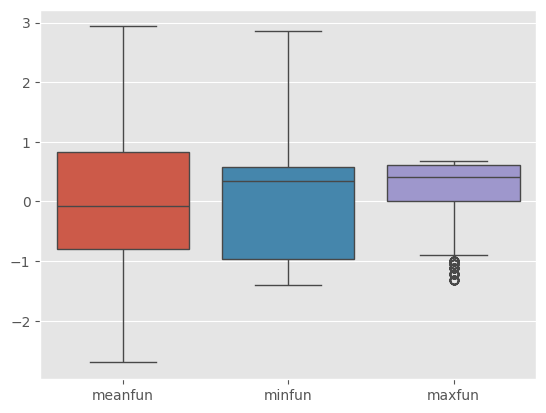

In [112]:
sns.boxplot(data=feature)

In [113]:
feature=np.array(feature)
feature

array([[-1.81175223, -1.0978248 ,  0.56586921],
       [-1.07942402, -1.09136033, -0.29398393],
       [-1.36515237, -1.10022288,  0.41041553],
       ...,
       [ 2.07745307,  0.1407061 ,  0.56586921],
       [ 0.91530045, -0.12065845, -0.29398393],
       [ 1.32490168,  1.32440501,  0.41041553]])

In [114]:
from sklearn.model_selection import train_test_split
feature_train,feature_test,target_train,target_test=train_test_split(feature,target,random_state=50,train_size=0.45)

In [115]:
model = LogisticRegression (solver = 'liblinear')
model.fit (feature_train, target_train)
predictions = model.predict(feature_test)
report = classification_report (target_test, predictions)
print(report)

              precision    recall  f1-score   support

       False       0.96      0.95      0.96       877
        True       0.95      0.96      0.96       866

    accuracy                           0.96      1743
   macro avg       0.96      0.96      0.96      1743
weighted avg       0.96      0.96      0.96      1743



c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [116]:
model=LinearSVC()
model.fit(feature_train,target_train)
train_pred=model.predict(feature_train)
y_preds=model.predict(feature_test)

print(f"Training score = {metrics.accuracy_score(target_train,train_pred)}")
print(f"Testing score = {metrics.accuracy_score(target_test,y_preds)}")

Training score = 0.9628070175438597
Testing score = 0.9569707401032702


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversi

Text(0, 0.5, 'accuracy')

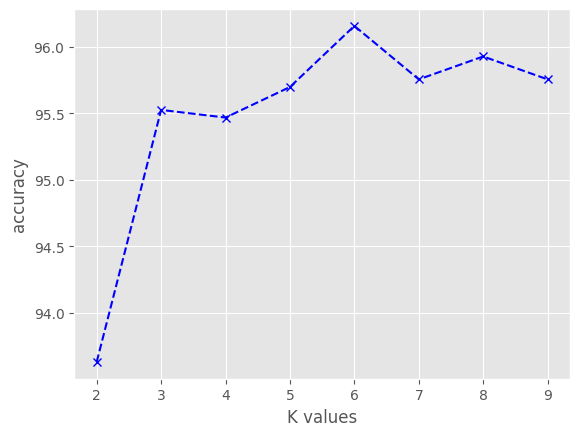

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
accuracy_vals = []
for i in range(2,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(feature_train, target_train)
    Y_pred = knn.predict(feature_test)
    accuracy_vals.append(metrics.accuracy_score(Y_pred, target_test) * 100)
plt.plot(range(2,10) , accuracy_vals, color='blue' , marker='x', linestyle='dashed')
plt.xlabel('K values')
plt.ylabel('accuracy')

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversi

Text(0, 0.5, 'Error Rate')

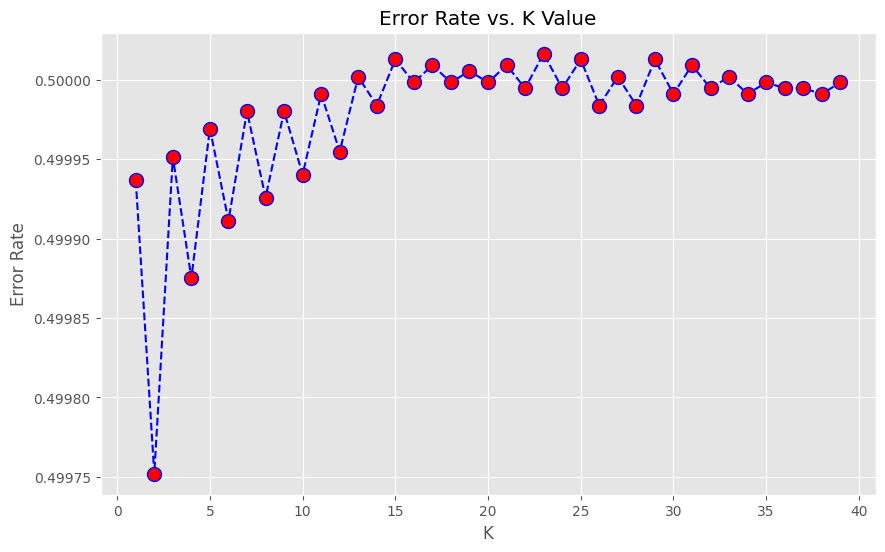

In [118]:
error_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(feature_train,target_train)
    pred_i = knn.predict(feature_test)
    error_rate.append(np.mean(pred_i != target_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [119]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(feature_train,target_train)

pred = knn.predict(feature_test)

acc  = accuracy_score(target_test,pred)
acc


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9615605278255881

In [120]:
# Save the trained model as an HDF5 file
with open('gender_detection_model.pkl', 'wb') as f:
    pickle.dump(model, f)
